In [415]:
#Importamos librerias necesarias 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score 

In [416]:
#Cargamos el Dataset de train
df = pd.read_excel("E-Commerce_train.xlsx")

In [ ]:
#Observamos el df
df.head()

In [417]:
#Normalizamos columnas
df.drop('ID', axis=1, inplace=True)
df = df.rename(columns={'Warehouse_block':'warehouse_block','Mode_of_Shipment':'mode_of_shipment',
'Customer_care_calls':'Customer_care_calls','Customer_rating':'customer_rating',
'Cost_of_the_Product':'cost_of_the_product','Prior_purchases':'prior_purchases',
'Product_importance':'product_importance','Gender':'gender','Discount_offered':'discount_offered',
'Weight_in_gms':'weight','Reached.on.Time_Y.N': 'reached_on_time'})

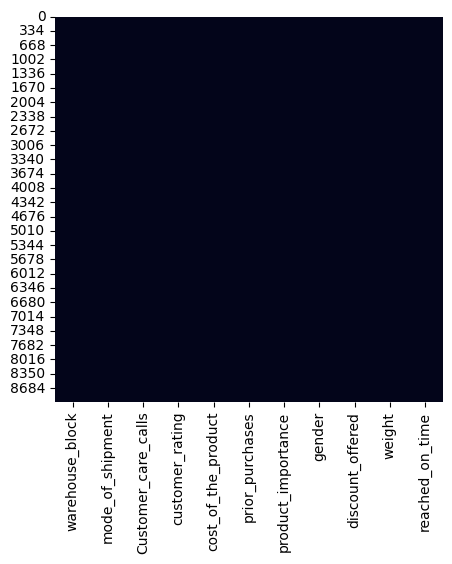

In [418]:
#Observamos graficamente los valores nulos (no hay)
fig = plt.figure(figsize=(5,5))
sns.heatmap(df.isnull(), cbar=False)
plt.show()

In [419]:
#Observamos estadisticas en el df
df.describe()

,Customer_care_calls,customer_rating,cost_of_the_product,prior_purchases,discount_offered,weight,reached_on_time
count,8999.000000,8999.000000,8999.000000,8999.000000,8999.000000,8999.000000,8999.000000
mean,4.015113,2.994999,208.561507,3.511501,15.097678,3584.364596,0.635515
std,1.138934,1.413143,48.289172,1.532074,17.400040,1614.750194,0.481312
min,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,3.000000,2.000000,168.000000,3.000000,4.000000,1857.000000,0.000000
50%,4.000000,3.000000,211.000000,3.000000,8.000000,4046.000000,1.000000
75%,5.000000,4.000000,249.500000,4.000000,19.000000,4999.500000,1.000000
max,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


In [420]:
# Observamos el tipo de datos de cada columna y observamos cuales son las categoricas y las numericas 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8999 entries, 0 to 8998
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   warehouse_block      8999 non-null   object
 1   mode_of_shipment     8999 non-null   object
 2   Customer_care_calls  8999 non-null   int64 
 3   customer_rating      8999 non-null   int64 
 4   cost_of_the_product  8999 non-null   int64 
 5   prior_purchases      8999 non-null   int64 
 6   product_importance   8999 non-null   object
 7   gender               8999 non-null   object
 8   discount_offered     8999 non-null   int64 
 9   weight               8999 non-null   int64 
 10  reached_on_time      8999 non-null   int64 
dtypes: int64(7), object(4)
memory usage: 773.5+ KB


In [421]:
#Codificamos las columnas categoricas para aplicar el modelo de regresion 
for col in df.columns:
  if(df[col].dtype == 'object'):
      labenc=LabelEncoder()
      df[col]=labenc.fit_transform(df[col])

In [423]:
df.head(3)

,warehouse_block,mode_of_shipment,Customer_care_calls,customer_rating,cost_of_the_product,prior_purchases,product_importance,gender,discount_offered,weight,reached_on_time
0,3,0,4,2,177,3,1,0,44,1233,1
1,4,0,4,5,216,2,1,1,59,3088,1
2,0,0,2,2,183,4,1,1,48,3374,1


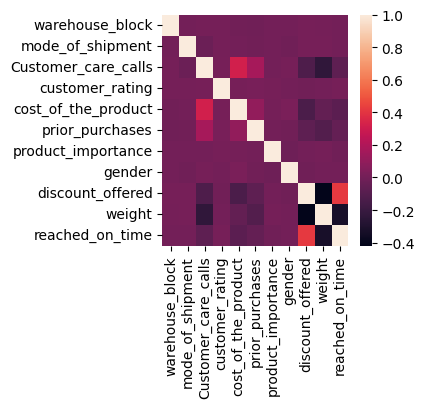

In [424]:
#graficamos el heatmap de la matriz de correlacion
fig = plt.figure(figsize=(3,3))
sns.heatmap(df.corr())
plt.show()

In [425]:
#Ordenamos las columnas por el grado de correlacion que tienen con la columna target
corr= df[:].corr()
correla=corr.sort_values(['reached_on_time'],ascending=False)

In [426]:
correla.reached_on_time

reached_on_time        1.000000
discount_offered       0.416357
customer_rating        0.011045
warehouse_block        0.003055
gender                 0.002881
mode_of_shipment      -0.000927
product_importance    -0.012081
prior_purchases       -0.048269
Customer_care_calls   -0.072261
cost_of_the_product   -0.083470
weight                -0.326877
Name: reached_on_time, dtype: float64

In [427]:
#Creamos el df de features que vamos a utilizar y el de target
df_features = df.drop(['reached_on_time'], axis = 1)
#df_features = df[['discount_offered','customer_rating']]
df_target = df['reached_on_time']

X = df_features
y = df_target

In [428]:
#creamos los grupos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [429]:
#Escalamos 
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [ ]:
#Escalamos 
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
#X_train = scaler.fit_transform(X_train)
#X_test = scaler.fit_transform(X_test)

In [430]:
# A probar con regresion logistica
from sklearn import linear_model

In [431]:
#Instanciamos el modelo y entrenamos
model = linear_model.LogisticRegression(solver='lbfgs', max_iter=670)
model.fit(X_train,y_train)

LogisticRegression(max_iter=670)

In [432]:
#Predecimos
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [433]:
#Evaluamos score 
print(accuracy_score(y_train, y_train_pred))
print(accuracy_score(y_test, y_test_pred))

0.6747387626472052
0.6663299663299663


In [434]:
print(recall_score(y_train, y_train_pred))
print(recall_score(y_test, y_test_pred))



0.744088281660536
0.7553580763199164


In [435]:
matrix1 = confusion_matrix(y_train, y_train_pred)
matrix2 = confusion_matrix(y_test,y_test_pred)
print(matrix1)
print(matrix2)

[[1236  987]
 [ 974 2832]]
[[ 534  523]
 [ 468 1445]]


In [436]:
#Cargamos el Dataset de test
df_test = pd.read_excel('E-Commerce_test.xlsx')


In [437]:
df_test.head(3)

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms
0,9000,F,Ship,5,1,189,2,medium,M,10,5248
1,9001,D,Ship,5,3,150,2,high,F,9,4446
2,9002,F,Ship,3,3,200,3,low,M,3,5739


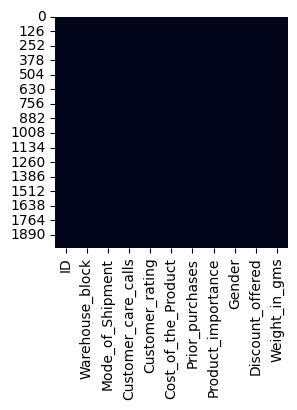

In [439]:
#Observamos graficamente los valores nulos (no hay)
fig = plt.figure(figsize=(3,3))
sns.heatmap(df_test.isnull(), cbar=False)
plt.show()

In [440]:
#Normalizamos columnas
df_test.drop('ID', axis=1, inplace=True)
df_test = df_test.rename(columns={'Warehouse_block':'warehouse_block','Mode_of_Shipment':'mode_of_shipment',
'Customer_care_calls':'Customer_care_calls','Customer_rating':'customer_rating',
'Cost_of_the_Product':'cost_of_the_product','Prior_purchases':'prior_purchases',
'Product_importance':'product_importance','Gender':'gender','Discount_offered':'discount_offered',
'Weight_in_gms':'weight'})

In [441]:
#Codificamos las columnas categoricas para aplicar el modelo de regresion 
for col in df_test.columns:
  if(df_test[col].dtype == 'object'):
      labenc=LabelEncoder()
      df_test[col]=labenc.fit_transform(df_test[col])

In [442]:
#Seleccionamos las columnas que vamos a utilizar para la prediccion
dftest_test = df_test

In [444]:
dftest_test.head(3)

,warehouse_block,mode_of_shipment,Customer_care_calls,customer_rating,cost_of_the_product,prior_purchases,product_importance,gender,discount_offered,weight
0,4,2,5,1,189,2,2,1,10,5248
1,3,2,5,3,150,2,0,0,9,4446
2,4,2,3,3,200,3,1,1,3,5739


In [445]:
#Escalamos
dftest_test = scaler.fit_transform(dftest_test)

In [446]:
#Predecimos
resultados = model.predict(dftest_test)

In [447]:
#Pasamos a df 
pred = pd.DataFrame(resultados, columns= ['pred']) 
pred

,pred
0,1
1,1
2,1
3,0
4,1
...,...
1995,1
1996,1
1997,1
1998,1


In [448]:
#Exportamos para finalizar.
pred.to_csv("Christiancarlosf.csv", index = False)
